<a href="https://colab.research.google.com/github/inhyuk914/-/blob/master/k_means_clustering_20184219_%EC%84%9C%EC%9D%B8%ED%98%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## k-means clustering 

**데이터를 k개의 군집(Cluster)으로 묶는(Clusting) 알고리즘 <br>
k는 묶을 군집(클러스터)의 개수를 의미하고 means는 평균을 의미**

1. 군집의 중심 위치 선정
2. 군집 중심을 기준으로 군집 재구성 
3. 군집별 평균 위치 결정 
4. 군집 평균 위치로 군집 중심 조정
5. 수렴할 때까지 2-4 과정 반복  

### Libraries 불러오기 ###

### 데이터 생성 ###
- 랜덤 데이터 생성 
- 3개의 중심을 기준으로 정규 분포를 따르는 임의의 데이터 생성 

### k-means 함수 정의 ###
1. 군집의 중심 위치 선정
2. 군집 중심을 기준으로 군집 재구성 
3. 군집별 평균 위치 결정 
4. 군집 평균 위치로 군집 중심 조정
5. 수렴할 때까지 2-4 과정 반복  

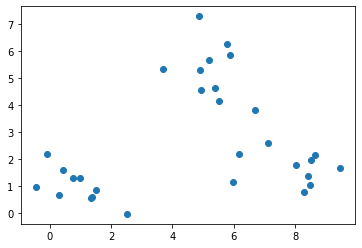

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
k = 3  # hyper paramters
center_1 = np.array([1,1])
center_2 = np.array([5,5])
center_3 = np.array([8,1])

data = np.random.randn(10,2) + center_1
data = np.concatenate((data, np.random.randn(10,2) + center_2))
data = np.concatenate((data, np.random.randn(10,2) + center_3))

plt.scatter(data[:,0], data[:, 1])

[[8.28439229 0.78463507]
 [1.38157318 0.58809835]
 [0.76296762 1.28583267]]
iter num:7


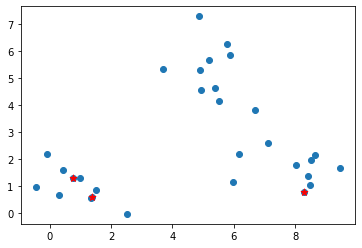

In [16]:
def distance(a, b):
    return sum((a - b) ** 2)/len(a)

def group_center(g):
    g = np.array(g)
    return g.mean(axis=0)

def cluster(x, k, iter_num=25):
    logs = []
    centers = x[np.random.choice(len(x), size=k, replace=False)]
    print(centers)
    plt.scatter(centers[:,0], centers[:, 1], s=50,color='red', marker='*')
    for it in range(iter_num):
        group = {}
        for i in range(k):
            group[i] = []
        # 가장 가까운 점 찾기
        for row in x:
            temp = []
            for i in range(k):
                temp.append(distance(centers[i], row))
            group[np.argmin(temp)].append(row.tolist())

        # plot data store
        for i in range(k):
            group_temp = np.array(group[i])
            group_temp = np.c_[group_temp, np.full(len(group_temp), i)]
            if i == 0:
                grouped = group_temp
            else:
                grouped = np.append(grouped, group_temp, axis = 0)

        # 업데이트하기
        centers_new = []
        for i in range(k):
            centers_new.append(group_center(group[i]).tolist())
        centers_new = np.array(centers_new)
        # if updated center == center, break

        if np.sum(centers - centers_new) == 0:
            break
        else:
            centers = centers_new
            logs.append(grouped)
    return grouped, logs, it  

plt.scatter(data[:,0], data[:, 1])
grouped, logs, it = cluster(data, 3)
print(f'iter num:{it}')


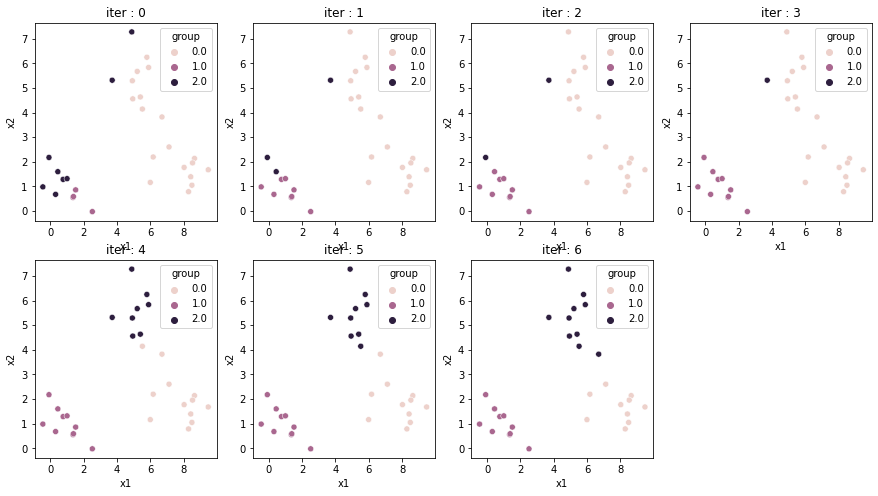

In [17]:
plt.figure(figsize=(15,8))
for i in range(it):
    plt.subplot(2, it//2+1, i+1)  # row, col, index
    df = pd.DataFrame(logs[i])
    df.columns = ['x1', 'x2', 'group']
    sns.scatterplot(data = df, x = 'x1', y = 'x2', hue = 'group').set_title(f'iter : {i}')